In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/prediction-of-insurance-charges-using-age-gender/insurance.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data processing:

In [3]:
df=pd.read_csv('/kaggle/input/prediction-of-insurance-charges-using-age-gender/insurance.csv')

**Checking nulls values:**

In [4]:
df.isnull().sum()

index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Checking duplicated values:**

In [5]:
df.duplicated().sum()

0

**Dataframe general info:**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


We don't need the index columns. So, I'm gonna delete it

In [7]:
df=df.drop(columns='index',axis=1)

# Exploratory Data Analysis:

**Checking unique regions in the dataset:**

In [8]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

**Charges amount distribution per sex histogram:**

<AxesSubplot:title={'center':'Charges amount distribution per sex'}, xlabel='charges', ylabel='Count'>

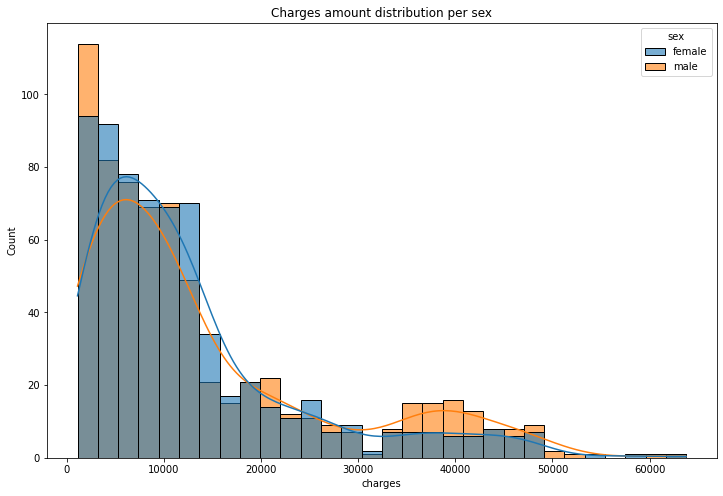

In [9]:
plt.figure(figsize=(12,8))
plt.title('Charges amount distribution per sex')
sns.histplot(df,x='charges',hue="sex",kde=True,alpha=0.6,linewidth=1)


We can see that the charge amount for males and females are equal, but there are more males than females paying more than $3200

**Age distribution histogram:**

<AxesSubplot:title={'center':'Age distribution'}, xlabel='age', ylabel='Count'>

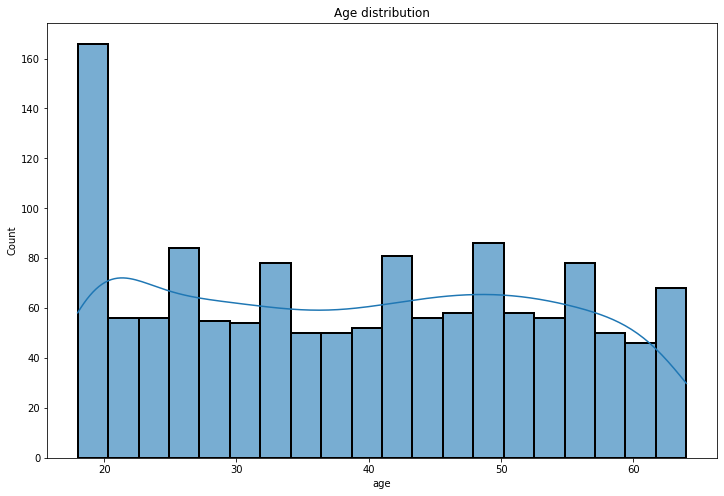

In [10]:
plt.figure(figsize=(12,8))
plt.title('Age distribution')
sns.histplot(df,x='age',kde=True,alpha=0.6,bins=20,linewidth=2)

It's obvious that the people between 18-20 are the biggest category in this dataset

**Charges amount distribution per smoker histogram:**

<AxesSubplot:title={'center':'Charges amount distribution per smoker'}, xlabel='charges', ylabel='Count'>

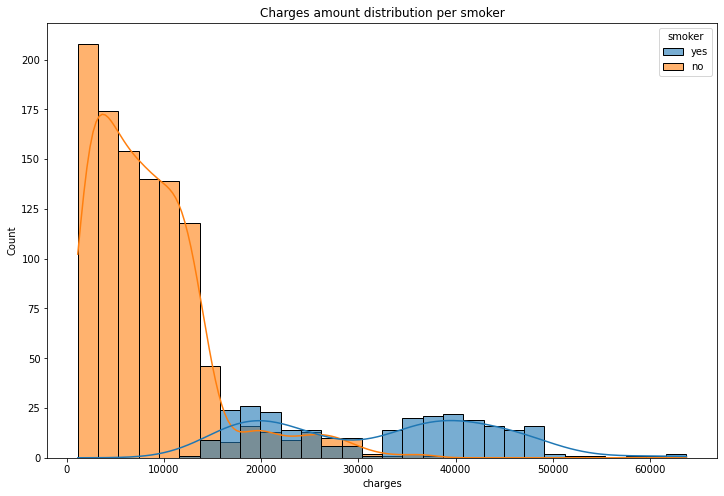

In [11]:
plt.figure(figsize=(12,8))
plt.title('Charges amount distribution per smoker')
sns.histplot(df,x='charges',hue="smoker",kde=True,alpha=0.6,linewidth=1)

From the histogram above, we can say that smoker people are getting charged more than non-smokers. They always start with $10000 as initial amount.

**Average charge amount per region:**

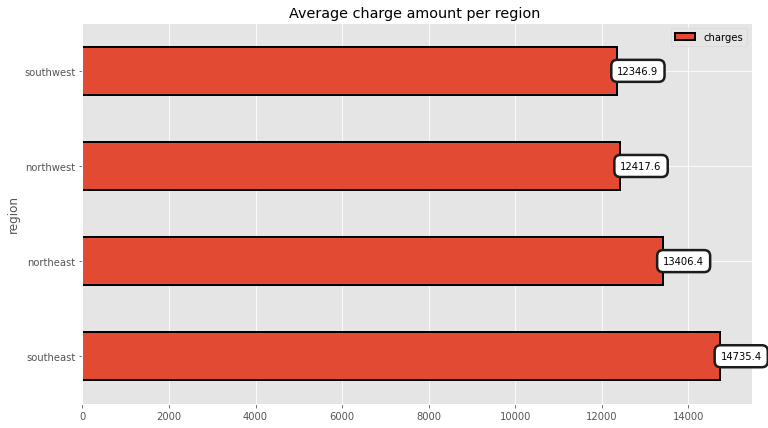

In [12]:
plt.style.use('ggplot')
reg=pd.pivot_table(df,index='region',values='charges')
reg=reg.sort_values(by='charges',ascending=False).head()
reg
p=reg.plot(kind='barh',figsize=(12,7),title='Average charge amount per region ',edgecolor = 'black',lw=2)
p.bar_label(p.containers[0], label_type='edge',padding=0.5, bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 2.5, "alpha": 1})
plt.show()

Southheast region has the highest average charge amount per region. In general, there is a small deffirence between regions in term of charging amount.

**Average charge amount per number of children:**

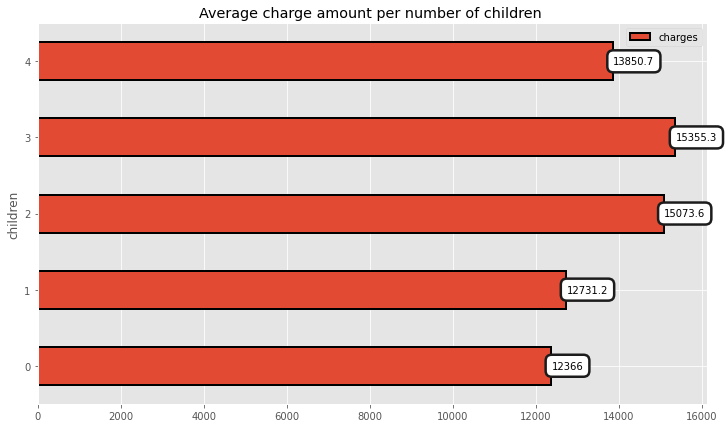

In [13]:
plt.style.use('ggplot')
child=pd.pivot_table(df,index='children',values='charges')
child=child.sort_values(by='children',ascending=True).head()
p2=child.plot(kind='barh',figsize=(12,7),title='Average charge amount per number of children ',edgecolor = 'black',lw=2)
p2.bar_label(p2.containers[0], label_type='edge',padding=0.5, bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 2.5, "alpha": 1})
plt.show()

In general, charging amount will increase when the number of children increase.

**Total charges amount per sex pie chart:**

In [14]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


array([<AxesSubplot:ylabel='charges'>], dtype=object)

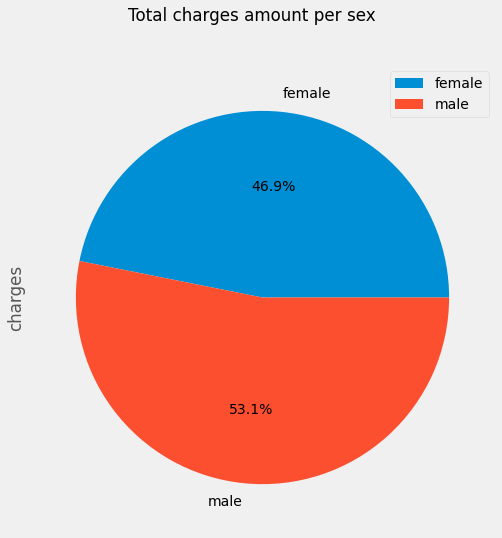

In [15]:
plt.style.use('fivethirtyeight')
sex=pd.pivot_table(df,index='sex',values='charges',aggfunc='sum')
sex.plot(kind='pie',figsize=(10,8),subplots=True,autopct='%1.1f%%',title='Total charges amount per sex')


In total, Males are getting charged more than females. I was expecting a huge gap but it's kinda small.

**Average BMI per age:**

<AxesSubplot:title={'center':'Average BMI per age '}, xlabel='age'>

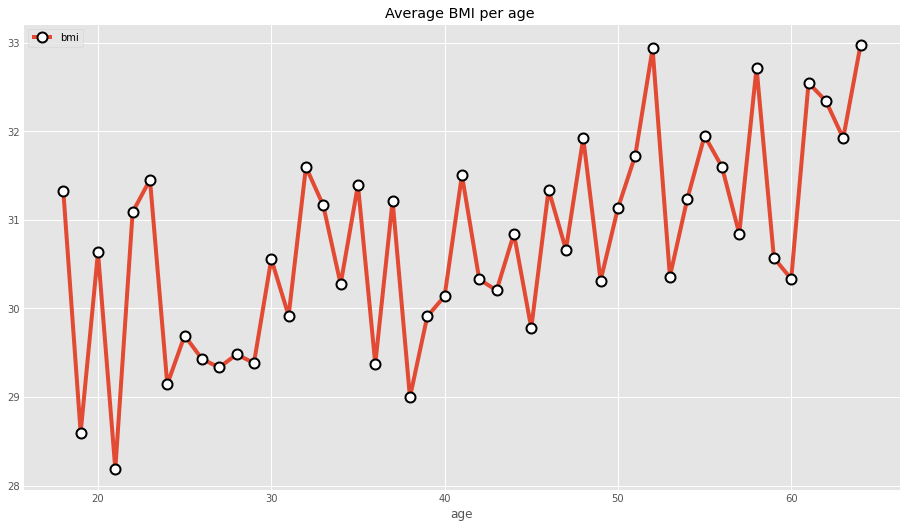

In [16]:
plt.style.use('ggplot')
agebmi=pd.pivot_table(df,index='age',values='bmi',aggfunc='mean')
agebmi.plot(kind='line',figsize=(14,8),title='Average BMI per age ',marker="o",linewidth=4,markersize=10,markerfacecolor="white",markeredgecolor="black",markeredgewidth=2)



As we can see, with time, the average BMI score starts getting higher to unhealthier ranges.

**Is there a relation between age and charge amount?**

<AxesSubplot:title={'center':'Age vs charges'}, xlabel='age', ylabel='charges'>

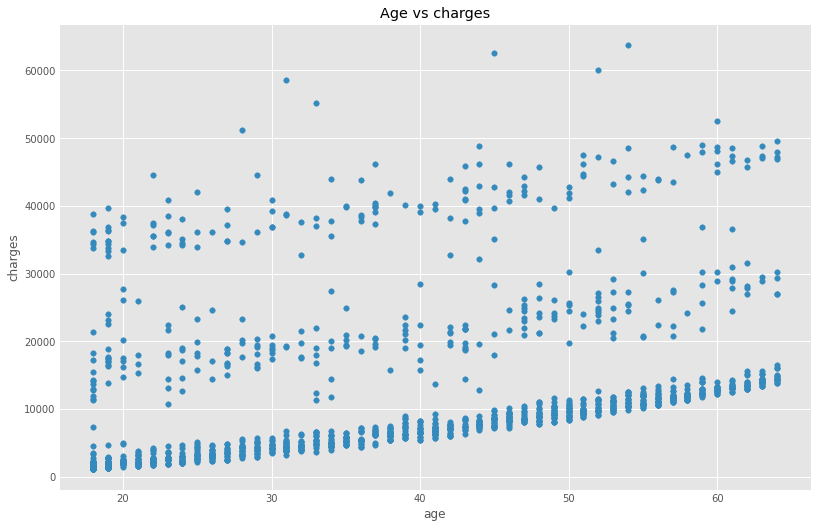

In [17]:
plt.style.use('ggplot')
df.plot(kind='scatter', x='age', y='charges',figsize=(12,8),s=30,title='Age vs charges')


There is a strong correlation between age and charges, especially in the charging range between 0-$15000.

**Data correlation:**

In [18]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


As we said before, charges and age have the highest correlation rate. But what about categorical variables?

**Creating a dataframe copy:**

In [19]:
df2=df.copy()

**Turning categorical columns into numeric:**

In [20]:
df2['sex']=pd.factorize(df2.sex)[0]
df2['smoker']=pd.factorize(df2.smoker)[0]
df2['region']=pd.factorize(df2.region)[0]

**Data correlation:**

<AxesSubplot:>

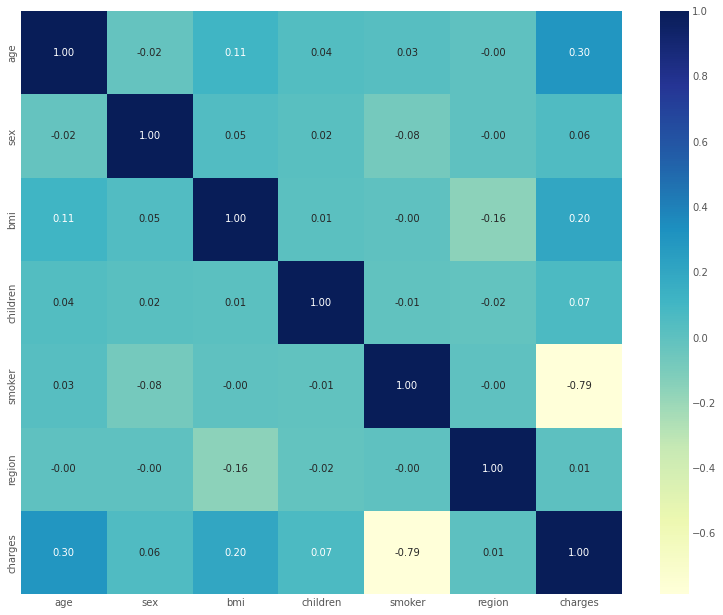

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(df2.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')

Well, smoker status has the highest impact on the charges amount. That's the most important factor we have.

# Machine learning model:

**Importing required libraries:**

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from math import sqrt

**Setting Features and target:**

In [23]:
X= df2.drop(columns='charges',axis=1)
Y= df2['charges']

**Splitting the dataset:**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 100)

**Selecting the GradientBoostingRegressor model:**

In [25]:
gbr = GradientBoostingRegressor()

**Setting parameters to use it later:**

In [26]:
model = gbr

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
learning_rate=[0.05,0.1,0.15,0.20]
max_features=[2,4,6,8,10]

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'max_features':max_features,
    'learning_rate':learning_rate
    }

There is more parameters that can be added, it will depends on the model.

**Selecting RandomizedSearchCV parameters:**

In [27]:
random_cv = RandomizedSearchCV(estimator=gbr,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

**Training the model:**

In [28]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 4/5] END learning_rate=0.15, max_depth=15, max_features=6, n_estimators=500;, score=(train=-13.738, test=-2882.408) total time=   1.7s
[CV 5/5] END learning_rate=0.1, max_depth=3, max_features=4, n_estimators=100;, score=(train=-2256.456, test=-2381.097) total time=   0.1s
[CV 3/5] END learning_rate=0.05, max_depth=15, max_features=2, n_estimators=1500;, score=(train=-34.772, test=-2893.492) total time=   2.4s
[CV 2/5] END learning_rate=0.2, max_depth=2, max_features=8, n_estimators=1500;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END learning_rate=0.2, max_depth=2, max_features=8, n_estimators=1500;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END learning_rate=0.2, max_depth=2, max_features=2, n_estimators=900;, score=(train=-1949.304, test=-2925.590) total time=   0.7s
[CV 4/5] END learning_rate=0.2, max_depth=2, max_features=2, n_estimators=900;, score=(train=-1800.311, test=-3244.511) total

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py", line 596, in fit
    monitor,
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py", line 672, in _fit_stages
    X_csr,
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py", line 246, in _fit_stage
    tree

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=50,
                   n_jobs=4,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'max_features': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

**Finding the best parameters:**

In [29]:
random_cv.best_params_

{'n_estimators': 100, 'max_features': 4, 'max_depth': 3, 'learning_rate': 0.05}

Now we have the best parameters with the highest score.

In [30]:
gbr = GradientBoostingRegressor(n_estimators= 100,max_features= 4, max_depth= 3, learning_rate= 0.05)

**Let's train the model with the new parameters:**

In [31]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_features=4)

**Finding the RMSE:**

In [32]:
ypred = gbr.predict(X_test)
mse = mean_squared_error(y_test,ypred)
rmse = sqrt(mse)
rmse

3980.93596211535

**Model score on the training data:**

In [33]:
score1 = gbr.score(X_train,y_train)
score1

0.8806843611165207

**Model testing score:**

In [34]:
y_pred1 = gbr.predict(X_test)
rscore1=r2_score(y_test, y_pred1)
rscore1

0.8889567778615086

The model seems okay for me, but it can be improved, do you have any ideas?

In [35]:
df2['pred']=gbr.predict(X)

**Model accuracy plotting:**

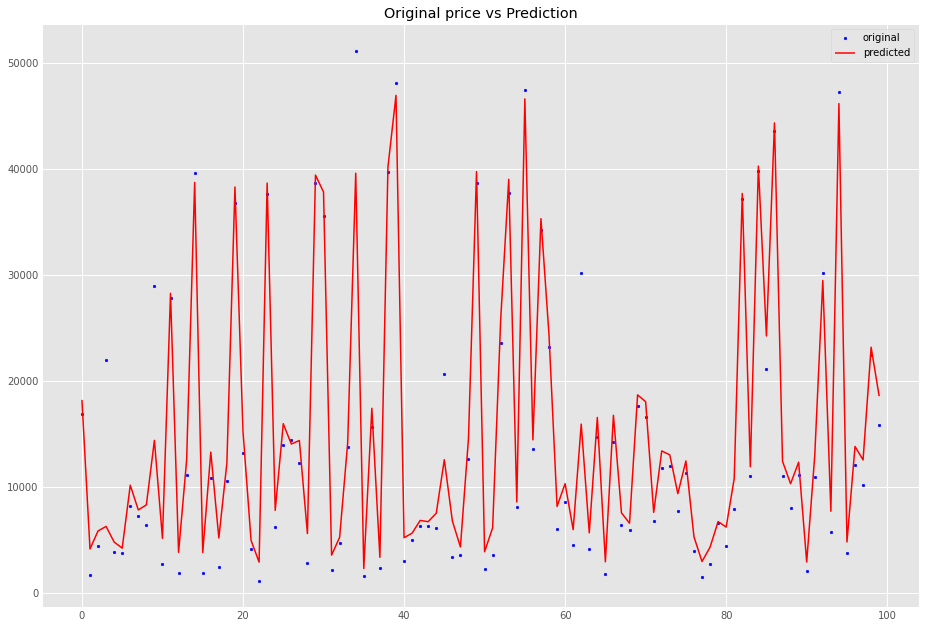

In [36]:
x_ax = range(len(df2['pred'].head(100)))
plt.figure(figsize=(14,10))
plt.title('Original price vs Prediction')
plt.scatter(x_ax, df2['charges'].head(100), s=7, color="blue", label="original")
plt.plot(x_ax, df2['pred'].head(100), lw=1.5, color="red", label="predicted")
plt.legend()
plt.show()

**Thank you! I hope you like this project!**